In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn import linear_model

In [85]:
train_df = pd.read_csv(r'C:\ML Projects\train.csv')
test_df = pd.read_csv(r'C:\ML Projects\test.csv')
df=pd.concat([train_df,test_df]).reset_index()

In [86]:
Fillnan = [x for x in df.columns if x!='SalePrice']
df[Fillnan] = df[Fillnan].fillna(df[Fillnan].mean())

In [87]:
df

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2919 non-null   int64  
 1   Id             2919 non-null   int64  
 2   MSSubClass     2919 non-null   int64  
 3   MSZoning       2915 non-null   object 
 4   LotFrontage    2919 non-null   float64
 5   LotArea        2919 non-null   int64  
 6   Street         2919 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2919 non-null   object 
 9   LandContour    2919 non-null   object 
 10  Utilities      2917 non-null   object 
 11  LotConfig      2919 non-null   object 
 12  LandSlope      2919 non-null   object 
 13  Neighborhood   2919 non-null   object 
 14  Condition1     2919 non-null   object 
 15  Condition2     2919 non-null   object 
 16  BldgType       2919 non-null   object 
 17  HouseStyle     2919 non-null   object 
 18  OverallQ

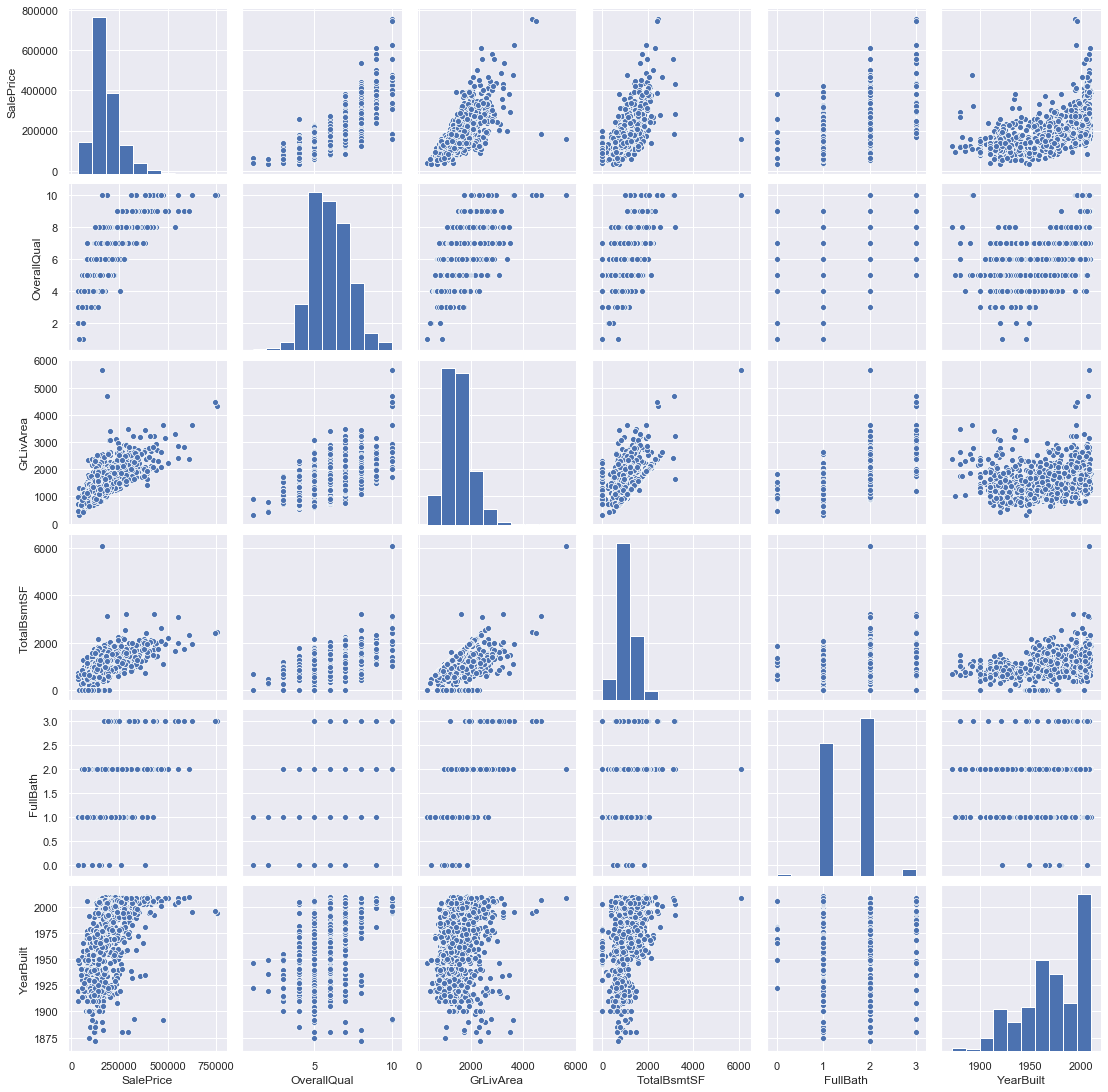

In [89]:
sns.set()
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[:1460][col])
plt.show();


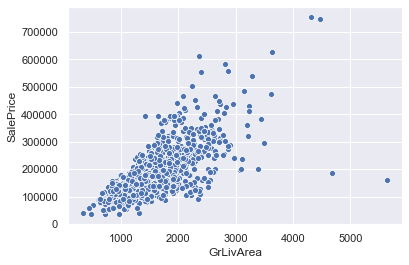

In [90]:
sns.scatterplot('GrLivArea', 'SalePrice', data=df[:1460]);

In [91]:
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

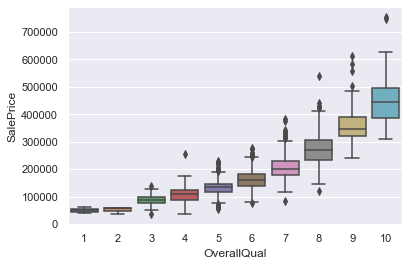

In [92]:
sns.boxplot(x='OverallQual', y="SalePrice", data=df)

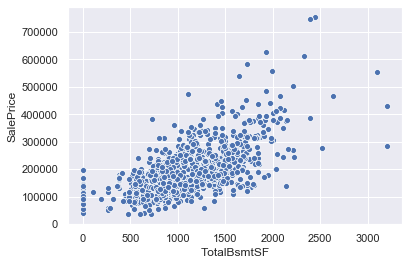

In [93]:
sns.scatterplot('TotalBsmtSF', 'SalePrice', data=df[:1458]);

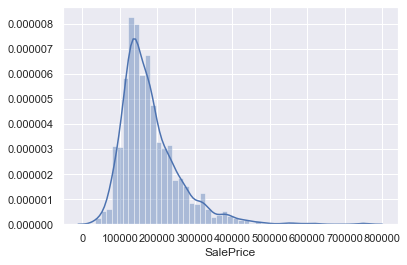

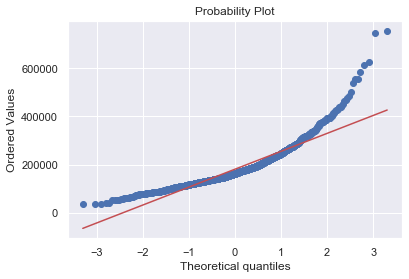

In [94]:
sns.distplot(df[:1458]['SalePrice']);
fig = plt.figure()
res = stats.probplot(df[:1458]['SalePrice'], plot=plt)

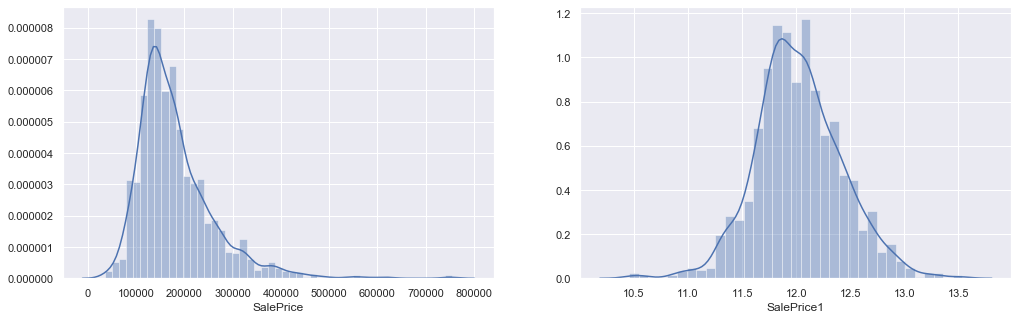

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(17,5))
sns.distplot(df[:1458]['SalePrice'],ax=axes[0]);

df.loc[df.SalePrice.notnull(), 'SalePrice1'] = np.log1p(df.loc[df.SalePrice.notnull(), 'SalePrice']) 
sns.distplot(df[:1458]['SalePrice1'],ax=axes[1]);

In [96]:
df.loc[df.SalePrice.notnull(), 'SalePrice1'] = np.log1p(df.loc[df.SalePrice.notnull(), 'SalePrice']) 

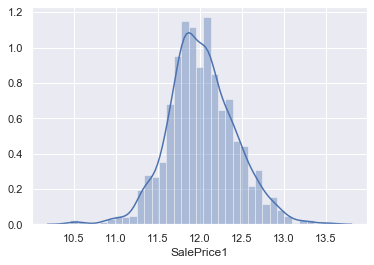

In [97]:
sns.distplot(df[:1458]['SalePrice1']);

In [98]:
df['SalePrice'] = np.log1p(df['SalePrice'])
df.columns


Index(['index', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'P

In [99]:
df.drop('SalePrice1',axis=1,inplace=True)

In [100]:
df['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
2914          NaN
2915          NaN
2916          NaN
2917          NaN
2918          NaN
Name: SalePrice, Length: 2917, dtype: float64

In [101]:
df1 = df[['SalePrice', 'GrLivArea', 'OverallQual', 'TotalBsmtSF']].corr()
df1[['SalePrice']]

,SalePrice
SalePrice,1.000000
GrLivArea,0.725211
OverallQual,0.821405
TotalBsmtSF,0.647563


In [102]:
col = ['GrLivArea', 'OverallQual', 'TotalBsmtSF']
X_train, X_test, Y_train, Y_test = train_test_split(df[:1458][col], df[:1458]['SalePrice'], test_size=0.33,random_state=42)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 1322 to 1297
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GrLivArea    482 non-null    int64  
 1   OverallQual  482 non-null    int64  
 2   TotalBsmtSF  482 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 15.1 KB


In [103]:
lm = LinearRegression()
lm.fit(X_train, Y_train);
Ypredicted = lm.predict(X_test)
df2 = pd.DataFrame({"Predicted":np.expm1(Ypredicted), 
              "Actual":np.expm1(Y_test.tolist())})
df2.head()

,Predicted,Actual
0,198206.634492,190000.0
1,124374.019283,100000.0
2,124258.523414,115000.0
3,170523.410294,159000.0
4,296360.321220,315500.0


In [104]:
print('Linear  | mean-squared-error :', round(mean_squared_error(Y_test, lm.predict(X_test)), 5))

Linear  | mean-squared-error : 0.03171


In [105]:
Xtrain=df[:1458][col]
Ytrain=df[:1458]['SalePrice']
Xtest=df[1458:][col]


In [106]:
lm1=LinearRegression()
lm1.fit(Xtrain,Ytrain);
predicted=lm1.predict(Xtest)

In [107]:
lm1.coef_

array([0.00026364, 0.14274503, 0.00023684])

In [108]:
np.expm1(predicted)

array([116478.49804249, 167415.44593664, 142857.71181927, ...,
       137714.3482867 , 119620.15884691, 212992.34711526])

In [109]:
cdf=pd.DataFrame({"Predicted":np.expm1(predicted), 
              "ID":df[1458:].Id})

In [110]:
cdf.astype(int)

,Predicted,ID
1460,116478,1461
1461,167415,1462
1462,142857,1463
1463,163617,1464
1464,217336,1465
...,...,...
2914,98204,2915
2915,98204,2916
2916,137714,2917
2917,119620,2918


In [111]:
submission = pd.DataFrame({'Id': df[1458:].Id, 'SalePrice': np.expm1(predicted).astype(int)}) 

In [112]:
submission

,Id,SalePrice
1460,1461,116478
1461,1462,167415
1462,1463,142857
1463,1464,163617
1464,1465,217336
...,...,...
2914,2915,98204
2915,2916,98204
2916,2917,137714
2917,2918,119620


In [ ]:
submission.to_csv('C:/ML Projects/Submission.csv',index=False)